## Final Project Submission

Please fill out:
* Student name: Edwin Nderitu
* Student pace: Full time
* Scheduled project review date/time: 12th March 2023
* Instructor name: William Okomba
* Blog post URL:


# Movie Genre Trends: An Exploratory Analysis

This project uses data collected from IMDB.

## Objective

The purpose of this project is to:
* analyze audience preference

* highlight trends in the industry

* forecast the future trajectory of the industry



The following datasets were used in the project:

   - The IMDB databse
   
   - BOM scv file  



In [2]:
# first we import the relevant packages and connect to the IMDB database:

import sqlite3
import pandas as pd

conn = sqlite3.connect("unzippedData/im.db")

In [3]:
# the code below shows the tables in the database 

df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [4]:
# since we will be using only two tables from the database
# we check of how the movie_basics looks like

movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [5]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
# below is a preview of the ratings table 

movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [7]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Now that we have a preview of the two tables, we joined the tables to highlight the top 10 rated genres.

This will give an insight to see which movie genres have the highest ratings over the years

In [8]:
avrate = """SELECT DISTINCT m.genres AS Genre, r.averagerating AS Rating 
FROM movie_basics m 
INNER JOIN movie_ratings r 
ON m.movie_id = r.movie_id 
ORDER BY Rating DESC;"""
pd.read_sql(avrate, conn).head(10)

,Genre,Rating
0,Documentary,10.0
1,"Comedy,Drama",10.0
2,"Crime,Documentary",10.0
3,Drama,10.0
4,"Documentary,History",10.0
5,"Adventure,Comedy",10.0
6,Drama,9.9
7,Documentary,9.9
8,Documentary,9.8
9,Action,9.8


Next we will check which movie genres were the highest rated in a period of 10 years.

This information will help us undersand the change of trend with time

In [9]:
gen_trend = """SELECT m.start_year AS Year, m.genres AS Genre, MAX(r.averagerating) AS Rating
FROM movie_basics m 
INNER JOIN movie_ratings r 
ON m.movie_id = r.movie_id 
GROUP BY Year
ORDER BY Year DESC, Rating DESC;
"""

pd.read_sql(gen_trend, conn)


,Year,Genre,Rating
0,2019,Documentary,10.0
1,2018,Documentary,10.0
2,2017,Drama,10.0
3,2016,Documentary,10.0
4,2015,Documentary,10.0
5,2014,"Biography,Documentary,Drama",9.8
6,2013,"Biography,Documentary,Music",9.8
7,2012,Documentary,10.0
8,2011,"Comedy,Documentary,Drama",9.4
9,2010,"Crime,Documentary",10.0


Now that we have data for the most rated movie genre in each year, we visualized the data by creating a stacked bar chart where each bar represents a year, and the height of each segment in the bar represents the average rating for that genre in that year. 

The legend shows which color corresponds to which genre.

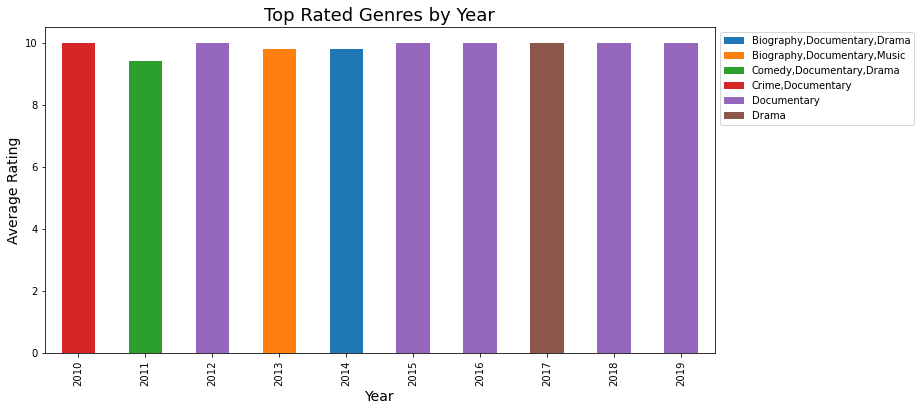

In [10]:
import matplotlib.pyplot as plt

dfg = pd.read_sql(gen_trend, conn)

# Pivot the data to create a matrix with genres as columns and years as rows
df_pivot = dfg.pivot(index='Year', columns='Genre', values='Rating')

# Create a stacked bar chart with one bar for each year
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))

# Set the title and axis labels
ax.set_title('Top Rated Genres by Year', fontsize=18)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Average Rating', fontsize=14)

# Add a legend and adjust its position
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


Next, we created a category for the movies. 

The following rating levels determined where each movie was categorized

- Rating of 0 - 3.99 = Poor

- Rating of 4 - 6.99 = Good

- Rating of 7 - 10 = Top-Rated

In [11]:
cate_rate = """SELECT m.primary_title as Title, start_year as Year, r.averagerating as Rating,
CASE
    WHEN r.averagerating BETWEEN 0 AND 3.99 THEN 'Poor' 
    WHEN r.averagerating BETWEEN 4 AND 6.99 THEN 'Good' 
    WHEN r.averagerating BETWEEN 7 AND 10 THEN 'Top-Rated' 
END AS Category
FROM movie_basics m JOIN movie_ratings r
ON m.movie_id = r.movie_id;
"""
pd.read_sql(cate_rate, conn)

,Title,Year,Rating,Category
0,Sunghursh,2013,7.0,Top-Rated
1,One Day Before the Rainy Season,2019,7.2,Top-Rated
2,The Other Side of the Wind,2018,6.9,Good
3,Sabse Bada Sukh,2018,6.1,Good
4,The Wandering Soap Opera,2017,6.5,Good
...,...,...,...,...
73851,Diabolik sono io,2019,6.2,Good
73852,Sokagin Çocuklari,2019,8.7,Top-Rated
73853,Albatross,2017,8.5,Top-Rated
73854,La vida sense la Sara Amat,2019,6.6,Good


Using the above data, we created a bar chart that shows the count of movies in each category for each year.


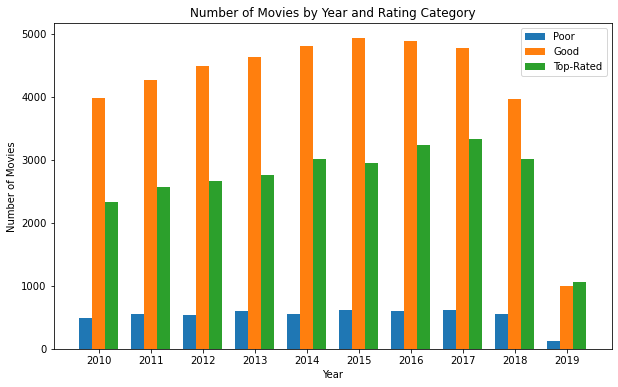

In [12]:
import numpy as np
df_cat = pd.read_sql(cate_rate, conn)

# Create a pivot table with the count of movies in each category for each year
table = pd.pivot_table(df_cat, values='Title', index='Year', columns='Category', aggfunc=len, fill_value=0)

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.25
years = table.index
x1 = np.arange(len(years))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

p1 = ax.bar(x1, table['Poor'], width, label='Poor')
p2 = ax.bar(x2, table['Good'], width, label='Good')
p3 = ax.bar(x3, table['Top-Rated'], width, label='Top-Rated')

ax.set_ylabel('Number of Movies')
ax.set_xlabel('Year')
ax.set_title('Number of Movies by Year and Rating Category')
ax.set_xticks(x2)
ax.set_xticklabels(years)
ax.legend()


According to the bar graph above we can conclude that over the years most movies are rated as above average wherelse few 

movies are rated as 'poor'

## View Count

Now, assuming that the vote count represents the percentage of watched movies, we can say that the movies with the least 

vote count have the lowest views while movies with highest vote count has the most views

Now we will get data of vote_count (views) and use that data 

In [13]:
views = """SELECT m.primary_title as Title, m.start_year as Year, m.genres as Genre, r.numvotes as Votes
FROM movie_basics m 
JOIN movie_ratings r ON m.movie_id = r.movie_id
ORDER BY Votes DESC


;"""

df_views = pd.read_sql(views, conn)
df_views.drop_duplicates(inplace=True)

df_views



,Title,Year,Genre,Votes
0,Inception,2010,"Action,Adventure,Sci-Fi",1841066
1,The Dark Knight Rises,2012,"Action,Thriller",1387769
2,Interstellar,2014,"Adventure,Drama,Sci-Fi",1299334
3,Django Unchained,2012,"Drama,Western",1211405
4,The Avengers,2012,"Action,Adventure,Sci-Fi",1183655
...,...,...,...,...
73851,Columbus,2018,Comedy,5
73852,BADMEN with a good behavior,2018,"Comedy,Horror",5
73853,July Kaatril,2019,Romance,5
73854,Swarm Season,2019,Documentary,5


With that information, we can get the top 10 most viewed movies, the top five most viewed movies each year and most viewd 

genre cummulatively.


Below is a list of the top 10 most viewed movies

## Top 10  Most Watched Movies

In [14]:
df_views.index = df_views.index + 1
df_views.head(10)


,Title,Year,Genre,Votes
1,Inception,2010,"Action,Adventure,Sci-Fi",1841066
2,The Dark Knight Rises,2012,"Action,Thriller",1387769
3,Interstellar,2014,"Adventure,Drama,Sci-Fi",1299334
4,Django Unchained,2012,"Drama,Western",1211405
5,The Avengers,2012,"Action,Adventure,Sci-Fi",1183655
6,The Wolf of Wall Street,2013,"Biography,Crime,Drama",1035358
7,Shutter Island,2010,"Mystery,Thriller",1005960
8,Guardians of the Galaxy,2014,"Action,Adventure,Comedy",948394
9,Deadpool,2016,"Action,Adventure,Comedy",820847
10,The Hunger Games,2012,"Action,Adventure,Sci-Fi",795227


## Top 10 Watched Movies Yearly

The code below prompts the user to input year between 2010 and 2019.

The results are the top 10 movies for that year

In [15]:
#below is a function that returns top 5 movies for a given year

def top_five(year):
    year_df = df_views[df_views['Year'] == year]
    top_movies = year_df.sort_values('Votes', ascending = False).head(10)
    return top_movies

# Prompt the user to enter a year from 2010 to 2019
year = int(input("Enter a year between 2010 and 2019: "))

if year < 2010 or year > 2019:
    print("Invalid year.")
else:
    top_movies = top_five(year)
    print(f"The top 10 most watched movies in {year} are:")
    for i, row in enumerate(top_movies.iterrows()):
        print(f"{i+1}. {row[1]['Title']}")


The top 10 most watched movies in 2018 are:
1. Avengers: Infinity War
2. Black Panther
3. Deadpool 2
4. Bohemian Rhapsody
5. A Quiet Place
6. Ready Player One
7. Venom
8. Aquaman
9. A Star Is Born
10. Ant-Man and the Wasp


# Relationship Between Movie Sale, Reviews and Watch Count

In this section we will check how movie ratings and watch count can affect sales. 

This relationship will help us understand how movie ratings affects domestic and foreign gross


In [16]:
#merge bom.movie dataset with the IMDB database

imdb = """SELECT *
FROM movie_basics m 
JOIN movie_ratings r ON m.movie_id = r.movie_id;"""

imdb_df = pd.read_sql(imdb, conn)

bom_df = pd.read_csv('unzippedData/bom.movie_gross.csv')

bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [17]:
gross_df = pd.merge(imdb_df, bom_df, left_on='primary_title', right_on='title', how='inner')

#change foreign gross to float
gross_df["foreign_gross"] = gross_df["foreign_gross"].str.replace(',', '').astype(float)



gross_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   movie_id         3027 non-null   object 
 7   averagerating    3027 non-null   float64
 8   numvotes         3027 non-null   int64  
 9   title            3027 non-null   object 
 10  studio           3024 non-null   object 
 11  domestic_gross   3005 non-null   float64
 12  foreign_gross    1832 non-null   float64
 13  year             3027 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 354.7+ KB


In [18]:
gross_df = gross_df.loc[:, ['primary_title', 'genres', 'averagerating', 'numvotes', 'studio', 'domestic_gross', 'foreign_gross', 'year']]
# replace missing values with 0
gross_df['domestic_gross'].fillna(0, inplace=True)
gross_df['foreign_gross'].fillna(0, inplace=True)

#group movies by title and get average of the rating and numvotes

gross_df = gross_df.groupby('primary_title').agg({'genres': 'first', 'averagerating': 'mean', 'numvotes': 'mean', 'studio': 'first', 'domestic_gross': 'mean', 'foreign_gross': 'mean', 'year': 'first'}).reset_index()


gross_df


,primary_title,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,'71,"Action,Drama,Thriller",7.2,46103.0,RAtt.,1300000.0,355000.0,2015
1,"1,000 Times Good Night","Drama,War",7.1,6848.0,FM,53900.0,0.0,2014
2,10 Cloverfield Lane,"Drama,Horror,Mystery",7.2,260383.0,Par.,72100000.0,38100000.0,2016
3,10 Years,"Comedy,Drama,Romance",6.1,22484.0,Anch.,203000.0,0.0,2012
4,1001 Grams,Drama,6.3,1301.0,KL,11000.0,0.0,2015
...,...,...,...,...,...,...,...,...
2593,Zindagi Na Milegi Dobara,"Comedy,Drama",8.1,58912.0,Eros,3100000.0,0.0,2011
2594,Zombeavers,"Action,Adventure,Comedy",4.8,14825.0,Free,14900.0,0.0,2015
2595,Zookeeper,"Comedy,Family,Romance",5.2,52396.0,Sony,80400000.0,89500000.0,2011
2596,Zoolander 2,Comedy,4.7,59914.0,Par.,28800000.0,27900000.0,2016


Now that we have all the data we need, we can highlight the relationship between ratings and foreign gross

In [19]:
rate_effect = gross_df.loc[:,['averagerating', 'domestic_gross', 'foreign_gross']]

rate_effect

,averagerating,domestic_gross,foreign_gross
0,7.2,1300000.0,355000.0
1,7.1,53900.0,0.0
2,7.2,72100000.0,38100000.0
3,6.1,203000.0,0.0
4,6.3,11000.0,0.0
...,...,...,...
2593,8.1,3100000.0,0.0
2594,4.8,14900.0,0.0
2595,5.2,80400000.0,89500000.0
2596,4.7,28800000.0,27900000.0


### Relationship Between Average Rating and Domestic Gross

Text(0, 0.5, 'Domestic Gross')

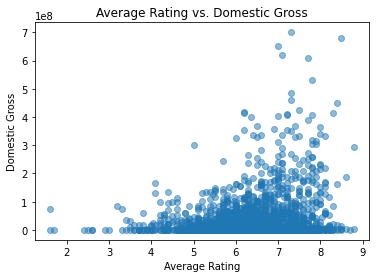

In [20]:
import matplotlib.pyplot as plt

# Create a scatter plot of averagerating vs. domestic_gross
plt.scatter(gross_df['averagerating'], gross_df['domestic_gross'], alpha=0.5)

# Set the plot title and axis labels
plt.title('Average Rating vs. Domestic Gross')
plt.xlabel('Average Rating')
plt.ylabel('Domestic Gross')



### Relationship Between Average Rating and Foreign Gross

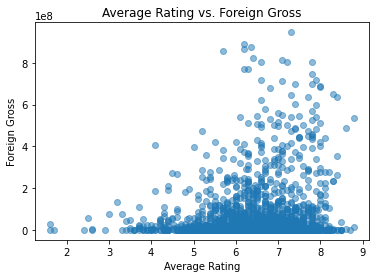

In [21]:
import matplotlib.pyplot as plt

# Create a scatter plot of averagerating vs. foreign_gross
plt.scatter(gross_df['averagerating'], gross_df['foreign_gross'], alpha=0.5)

# Set the plot title and axis labels
plt.title('Average Rating vs. Foreign Gross')
plt.xlabel('Average Rating')
plt.ylabel('Foreign Gross')

# Show the plot
plt.show()


### Results

According to the above representations, we concluded that the higher a movie is rated, the better it sells.

This shows that people tend to buy/stream highly rated movies more.

Rating will affect how a movie sells both locally and internationally

Next, we looked at how engagements (represented by vote count as it shows how many people have engaged with the movie)

affects or relates to the sale of the movie.


In [22]:
watch_effect = gross_df.loc[:,['numvotes', 'domestic_gross', 'foreign_gross']]

watch_effect

,numvotes,domestic_gross,foreign_gross
0,46103.0,1300000.0,355000.0
1,6848.0,53900.0,0.0
2,260383.0,72100000.0,38100000.0
3,22484.0,203000.0,0.0
4,1301.0,11000.0,0.0
...,...,...,...
2593,58912.0,3100000.0,0.0
2594,14825.0,14900.0,0.0
2595,52396.0,80400000.0,89500000.0
2596,59914.0,28800000.0,27900000.0


### Relationship Between Vote Count and Domestic Gross

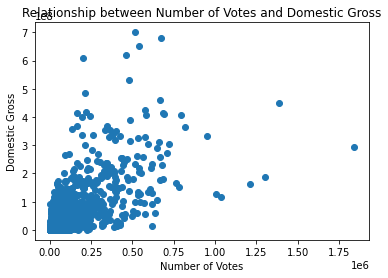

In [23]:
# Scatter plot for numvotes vs domestic_gross

plt.scatter(watch_effect['numvotes'], watch_effect['domestic_gross'])
plt.xlabel('Number of Votes')
plt.ylabel('Domestic Gross')
plt.title('Relationship between Number of Votes and Domestic Gross')
plt.show()

### Relationship Between Vote Count and Foreign Gross

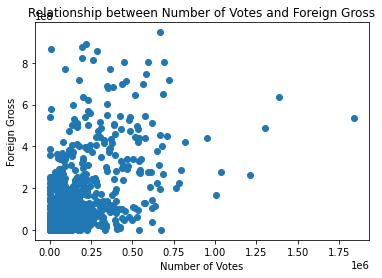

In [24]:
# Scatter plot for numvotes vs foreign_gross
plt.scatter(watch_effect['numvotes'], watch_effect['foreign_gross'])
plt.xlabel('Number of Votes')
plt.ylabel('Foreign Gross')
plt.title('Relationship between Number of Votes and Foreign Gross')
plt.show()

### Results

According to the representations above, we concluded that there is no signficant efect between viewrs engagement and movie sales. 

What really matters is the average rating that the movie will get.

## Relationship Between Movie Genres and Gross Sales

In this part, we analyzed the sales variation of different genres. This analysis will show whether some genres sell more than others.

The analysis will help study the market and show where consumers are willing to pay more. The analysis will also highlight which genres sold more in the past years.

The analysis studies consumer behaviour over a preiod of 10 years (2010-2019)

In [25]:
#get relevant datafram

genre_vs_sales_df = gross_df.loc[:,['genres', 'domestic_gross', 'foreign_gross']]

genre_vs_sales_df

,genres,domestic_gross,foreign_gross
0,"Action,Drama,Thriller",1300000.0,355000.0
1,"Drama,War",53900.0,0.0
2,"Drama,Horror,Mystery",72100000.0,38100000.0
3,"Comedy,Drama,Romance",203000.0,0.0
4,Drama,11000.0,0.0
...,...,...,...
2593,"Comedy,Drama",3100000.0,0.0
2594,"Action,Adventure,Comedy",14900.0,0.0
2595,"Comedy,Family,Romance",80400000.0,89500000.0
2596,Comedy,28800000.0,27900000.0


From that dataset, we can find the top 10 genres with the most sales. To do that we summed domestic gross and foreign gross 

and then selected the top 10 with the highest sum

In [29]:
genre_vs_sales_df = gross_df.loc[:,['genres', 'domestic_gross', 'foreign_gross']]

genre_vs_sales_df['total_gross'] = genre_vs_sales_df['domestic_gross'] + genre_vs_sales_df['foreign_gross']

genre_gross = genre_vs_sales_df.groupby('genres')['total_gross'].sum().reset_index()

genre_gross = genre_gross.sort_values('total_gross', ascending=False).reset_index(drop=True)

top_10_genres = genre_gross.head(10)['genres'].tolist()

top_10_genres


['Action,Adventure,Sci-Fi',
 'Adventure,Animation,Comedy',
 'Action,Adventure,Fantasy',
 'Action,Adventure,Comedy',
 'Action,Adventure,Animation',
 'Action,Adventure,Thriller',
 'Action,Adventure,Drama',
 'Comedy',
 'Action,Thriller',
 'Action,Crime,Thriller']

According to our findings we have seen that the top 10 genres with the highest sales are 

1. Action,Adventure,Sci-Fi

2. Adventure,Animation,Comedy

3. Action,Adventure,Fantasy

4. Action,Adventure,Comedy

5. Action,Adventure,Animation

6. Action,Adventure,Thriller

7. Action,Adventure,Drama

8. Comedy

9. Action,Thriller

10. Action,Crime,Thriller

# Conclusion

According to the annalysis done on movie genre trends, we concluded that various factors affect viewres behaviour when it comes to buying and watching movies.

Some of these factors are:
    
   * Movie rating

   * Genre

   * Year of release

   * Movie reviews
 

# Recommendation

Based on our analysis of movie genre trends, we found that the genre of a movie plays a significant role in its success. 

Action and adventure movies have consistently performed well in both domestic and foreign markets, while comedies and dramas 

have been less consistent in their performance.


Our analysis also showed that viewers tend to prefer movies with higher ratings and positive reviews. Therefore, we recommend 

that movie producers focus on producing high-quality movies and investing in effective marketing strategies that highlight 

positive ratings and reviews.


Additionally, our analysis suggests that movie producers should pay attention to the year of release, as viewers tend to 

prefer more recent movies. Producers should, therefore, strive to keep their content fresh and relevant to current trends.



Overall, the key to success in the movie industry is to produce high-quality movies that appeal to viewers' preferences and 

to effectively market those movies to a wider audience. By considering these factors, movie producers can increase their 

chances of producing successful movies and building a loyal fan base.
